
___
Milestones 1

Nama  : Fadhiil Dzaki Mulyana<br>
Batch : HCK-021

Notebook ini dibuat untuk melakukan analisis terhadap Employee Attrition. Hasil Analisis tersebut ditujukan kepada tim HR guna menyusun strategi untuk mengurangi Attrition.
___

# Tableau

https://public.tableau.com/app/profile/fadhiil.dzaki.mulyana/viz/tablue_fadhiil/AttritionAnalysis

# Library & function

In [2]:
# pengolahan data
import pandas as pd
import numpy as np

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# statistik
from scipy.stats import chi2_contingency


import warnings
warnings.filterwarnings('ignore')

In [3]:
# fungsi crosstab
def crosstable(df,a,b):
    '''
    fungsi ini digunakan untuk membuat cross tabulation dari 2 variable berbeda

    argumen:
    df = dataframe yang digunakan
    a = variable yang ingin dibandingkan
    b = variable pembanding

    output:
    cross table
    '''
    # cross tabulation
    chi_tab = pd.crosstab(df[a], df[b])
    # mengembalikan chi_tab
    return chi_tab

# fungsi chi2_contigency
def chi2square(df,a,b):
    '''
    fungsi ini digunakan untuk melakukan perhitungan statistika chisquared

    argumen:
    df = dataframe yang digunakan
    a = variable yang ingin dibandingkan
    b = variable pembanding

    Output:
    chi-squared statistic, p-value, degrees of freedom, expected frequencies
    '''
    # chi2 calculation
    chi2, p_value, dof, expected = chi2_contingency(crosstable(df,a,b))
    # mengembalikan nilia nilai hasil kalkulasi
    return chi2, p_value, dof, expected

# A. Identifikasi Masalah

## Background


PT. INDO Performance yang bergerak dibidang industri kesehatan sedang mengalami masalah turnover. Perusahaan tersebut ingin mengurangi angka turnover tersebut.

## Problem Statement

### SMART Framework

**(S)** : Mengurangi turnover karyawan PT INDO Performance.

**(M)** : Turnover berkurang sebanyak 6%.

**(A)** : penyesuaian gaji dan insentif, peningkatan budaya kerja, Perbaikan sistem rekrutmen, program pengembangan karir dan engagement karyawan.

**(R)** : mengurangi biaya operasional, meningkatkan loyalitas karyawan, meningkatkan citra perusahaan, menjaga produktivitas dan mental tim.

**(T)** : tercapai dalam 12 bulan kedepan

### Problem Statement

Mengurangi persentase turnoversebanyak 6% dalam waktu 12 bulan. Hal tersebut dapat dicapai dengan exploratory data analysis untuk mendapatkan faktor-faktor penyebab turnover, visualisasi data untuk melihat pola dan menarik kesimpulan dan rekomendasi dari insight-insight yang didapatkan. Pemahaman yang baik mengenai faktor-faktor turnover akan membantu dalam pengambilan keputusan untuk meningkatkan retensi karyawan sekaligus  mengurangi biaya operasional, meningkatkan loyalitas karyawan, meningkatkan citra perusahaan, menjaga produktivitas dan mental tim.


### Problem Breakdown

**5W+1H**:

1. berapa Rata-rata Attrition?
2. Apakah Environment Satisfaction Berpengaruh Terhadap Attrition?
3. Bagaimana Pengaruh Environment Satisfaction Terhadap Attrition?
4. Apakah Job Satisfaction Berpengaruh Terhadap Attrition?
5. Bagaimana Pengaruh Job Satisfaction Terhadap Attrition?
6. Apakah Relationship Satisfaction Berpengaruh Terhadap Attrition?
7. Bagaimana Pengaruh Relationship Satisfaction Terhadap Attrition?
8. Apakah Work-Life Balance Berpengaruh Terhadap Attrition?
9. Bagaimana Pengaruh Work-Life Balance Terhadap Attrition?
10. Bagaimana Pengaruh Lama Bekerja di Perusahaan terhadap Attrition

# Data Loading

## Data Understanding

**Dataset Source** : https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data

**About Dataset:**<br>
Dataset ini berisi analisis komprehensif dan diversifikasi mengenai karyawan organisasi, meliputi faktor-faktor seperti atrisi karyawan, faktor pribadi dan pekerjaan, keuangan, dan parameter-parameter lainnya seperti usia, jenis kelamin, dan status perkawinan.

**Columns**:
Column name                                         |Description
----------------------------------------------------|-------------------------------------------------------------------------
Age                                                 |The age of the employee. (Numerical)
Attrition                                           |Whether or not the employee has left the organization. (Categorical)
BusinessTravel                                      |The frequency of business travel for the employee. (Categorical)
DailyRate                                           |The daily rate of pay for the employee. (Numerical)
Department                                          |The department the employee works in. (Categorical)
DistanceFromHome                                    |The distance from home in miles for the employee. (Numerical)
Education                                           |The level of education achieved by the employee. (Categorical)
EducationField                                      |The field of study for the employee's education. (Categorical)
EmployeeCount                                       |The total number of employees in the organization. (Numerical)
`EmployeeNumber`                                    |A unique identifier for each employee profile. (Numerical)
EnvironmentSatisfaction                             |The employee's satisfaction with their work environment 1-4. (Categorical)
Gender                                              |The gender of the employee. (Categorical)
HourlyRate                                          |The hourly rate of pay for the employee. (Numerical)
JobInvolvement                                      |The level of involvement required for the employee's job 1-4. (Categorical)
JobLevel                                            |The job level of the employee. (Categorical)
JobRole                                             |The role of the employee in the organization. (Categorical)
JobSatisfaction                                     |The employee's satisfaction with their job 1-4. (Categorical)
MaritalStatus                                       |The marital status of the employee. (Categorical)
MonthlyIncome                                       |The monthly income of the employee. (Numerical)
MonthlyRate                                         |The monthly rate of pay for the employee. (Numerical)
NumCompaniesWorked                                  |The number of companies the employee has worked for. (Numerical)
Over18                                              |Whether or not the employee is over 18. (Categorical)
OverTime                                            |Whether or not the employee works overtime. (Categorical)
PercentSalaryHike                                   |The percentage of salary hike for the employee. (Numerical)
PerformanceRating	                                |The performance rating of the employee. (Categorical)
RelationshipSatisfaction                            |The employee's satisfaction with their relationships 1-4. (Categorical)
StandardHours                                       |The standard hours of work for the employee. (Numerical)
StockOptionLevel                                    |The stock option level of the employee. (Categorical)
TotalWorkingYears                                   |The total number of years the employee has worked. (Numerical)
TrainingTimesLastYear                               |The number of times the employee was taken for training in the last year. (Numerical)
WorkLifeBalance                                     |The employee's perception of their work-life balance 1-4. (Categorical)
YearsAtCompany                                      |The number of years the employee has been with the company. (Numerical)
YearsInCurrentRole                                  |The number of years the employee has been in their current role. (Numerical)
YearsSinceLastPromotion                             |The number of years since the employee's last promotion. (Numerical)
YearsWithCurrManager                                |The number of years the employee has been with their current manager. (Numerical)

In [4]:
# tampilkan seluruh kolom
pd.set_option('display.max_columns', None)

# Load dataset
df_ori = pd.read_csv("HR_Analytics.csv")

# 5 baris acak
df_ori.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
907,44,No,Travel_Rarely,1099,Sales,5,3,Marketing,1,1267,2,Male,88,3,5,Manager,2,Married,18213,8751,7,Y,No,11,3,3,80,1,26,5,3,22,9,3,10
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
731,20,Yes,Travel_Rarely,1097,Research & Development,11,3,Medical,1,1016,4,Female,98,2,1,Research Scientist,1,Single,2600,18275,1,Y,Yes,15,3,1,80,0,1,2,3,1,0,0,0
1125,29,No,Travel_Frequently,995,Research & Development,2,1,Life Sciences,1,1590,1,Male,87,3,2,Healthcare Representative,4,Divorced,8853,24483,1,Y,No,19,3,4,80,1,6,0,4,6,4,1,3
575,54,No,Travel_Rarely,376,Research & Development,19,4,Medical,1,799,4,Female,95,3,2,Manufacturing Director,1,Divorced,5485,22670,9,Y,Yes,11,3,2,80,2,9,4,3,5,3,1,4


In [5]:
# Checkpoint
df = df_ori.copy()

## Data Overview

In [6]:
# df overview
df.info()

# missing value check
print(f"\nmissing values: {round(((df.isna().sum().sum())/len(df))*100, 2)}% \n{df.isna().sum()[df.isna().sum()>0]}")

# duplicated value
print(f"\nduplicated values: {round(((df.duplicated(subset="EmployeeNumber").sum())/len(df))*100,2)}% \n{df.duplicated(subset="EmployeeNumber").sum()}\n")

# unique value counts
for col in df:
  print(col,'-#nunique: ',df[col].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dataset memiliki:
- 1470 Baris yang dimulai dari 0 - 1469
- 35 kolom dengan 18 kolom object dan 17 numerik, karena Ada beberapa kolom kategorikal ordinal seperti: 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', RelationshipSatisfaction, 'StockOptionLevel', dan 'WorkLifeBalance', 'PerformanceRating', 'JobLevel'
- tipe data sudah sesuai denngan seharusnya. OK
- nama kolom pada dataset terlihat normal dan konsisten. OK
- tidak memiliki missing value maupun duplicate value. OK

# Analisis dan perhitungan


## berapa Rata-rata Attrition

In [7]:
# replaye Yes-No dengan 1-0
df_attrition = df.copy()
df_attrition.replace({"Yes":1,'No':0},inplace=True)

df_attrition['Attrition'].mean()

# save attrition
df_attrition[['EmployeeNumber','Attrition']].to_csv('attrition.csv',index=False)

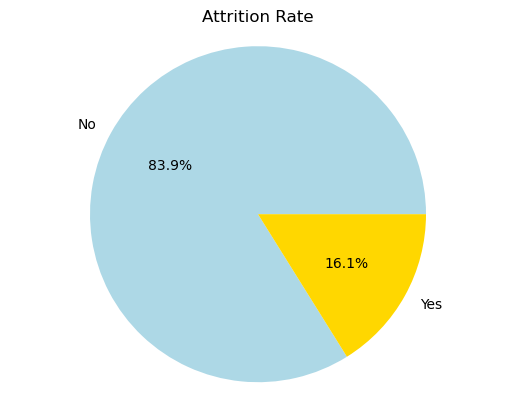

In [8]:
# value counts
attrition = df['Attrition'].value_counts()

count = attrition.values
label = attrition.index

plt.pie(count, labels=label, 
        autopct='%1.1f%%',
        colors=['lightblue','gold'])
plt.title('Attrition Rate')
plt.axis('equal')
plt.show()

rata-rata turnover karyawan adalah 0.16 atau 16.12% yang mana angka tersebut cukup tinggi. turn over yang ideal dalam sebuah perusahaan berkisar antara 10-12%.

## Apakah Environment Satisfaction Berpengaruh Terhadap Attrition

H0:Environment satisfaction tidak mempengaruhi employee attrition<br>
H1: Environment satisfaction mempengaruhi employee attrition

uji Chi Square karena kategorikal-kaetgorikal variable.

In [9]:
# calculate chisquare
chi2, p_value, dof, expected = chi2square(df,'EnvironmentSatisfaction','Attrition')

# besar pvalue
print('P Value : ',p_value)

# Interpretasi hasil
# kondisi tolak H0
if p_value < 0.05:
    print('H0 berhasil ditolak: Environment satisfaction mempengaruhi employee attrition')
# kondisi gagal tolak H0
else:
    print('H0 gagal ditolak: Environment satisfaction tidak mempengaruhi employee attrition')

P Value :  5.1234689062894205e-05
H0 berhasil ditolak: Environment satisfaction mempengaruhi employee attrition


## Bagaimana Pengaruh Environment Satisfaction Terhadap Attrition

In [10]:
# melihat cross tabulation
cross_table = crosstable(df,'EnvironmentSatisfaction','Attrition')

# calculate rate
cross_table['Rate'] = (cross_table['Yes'] / (cross_table['Yes'] + cross_table['No']))*100

# save
cross_table.to_csv('ct_EnvironmentSatisfaction.csv')

# show crosstable
cross_table

Attrition,No,Yes,Rate
EnvironmentSatisfaction,,,
1,212,72,25.352113
2,244,43,14.982578
3,391,62,13.686534
4,386,60,13.452915


dapat dilihat bahwa 25% karyawan turnover karena tidak senang dengan lingkungan kerjanya

Text(0, 0.5, 'Rate (%)')

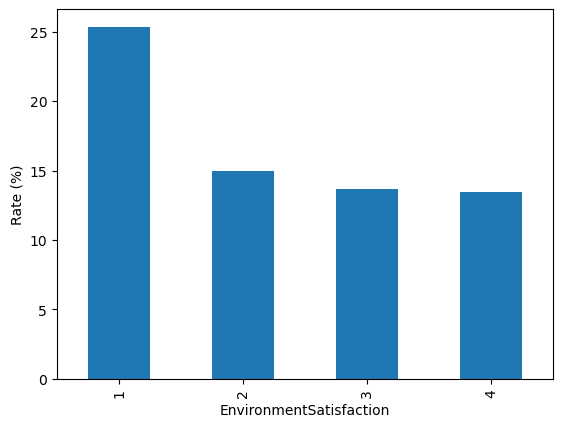

In [11]:
# sort
cross_table.sort_values('Rate', ascending=True).reset_index(drop=True)

# barplot
cross_table['Rate'].plot(kind='bar', stacked=False)

# atribut
plt.ylabel('Rate (%)')

pegawai yang turnover kebanyakan memiliki tingkat kepuasan 1. kebanyakan pegawai turnover karena tidak puas dengan lingkungannya

## Apakah Job Satisfaction Berpengaruh Terhadap Attrition

H0: Job Satisfaction tidak mempengaruhi employee attrition<br>
H1: Job Satisfaction mempengaruhi employee attrition

uji Chi Square karena kategorikal-kaetgorikal variable.

In [12]:
# calculate chisquare
chi2, p_value, dof, expected = chi2square(df,'JobSatisfaction','Attrition')

# besar pvalue
print('P Value : ',p_value)

# Interpretasi hasil
# kondisi tolak H0
if p_value < 0.05:
    print('H0 berhasil ditolak: Job Satisfaction mempengaruhi employee attrition')
# kondisi gagal tolak H0
else:
    print('H0 gagal ditolak: Job Satisfaction tidak mempengaruhi employee attrition')

P Value :  0.0005563004510387556
H0 berhasil ditolak: Job Satisfaction mempengaruhi employee attrition


## Bagaimana Pengaruh Job Satisfaction Terhadap Attrition

In [13]:
# melihat cross tabulation
cross_table = crosstable(df,'JobSatisfaction','Attrition')

# calculate rate
cross_table['Rate'] = (cross_table['Yes'] / (cross_table['Yes'] + cross_table['No']))*100

# save
cross_table.to_csv('ct_JobSatisfaction.csv')

# show crosstable
cross_table

Attrition,No,Yes,Rate
JobSatisfaction,,,
1,223,66,22.837370
2,234,46,16.428571
3,369,73,16.515837
4,407,52,11.328976


dapat dilihat bahwa 22% karyawan turnover karena tidak senang dengan pekerjaannya

Text(0, 0.5, 'Rate (%)')

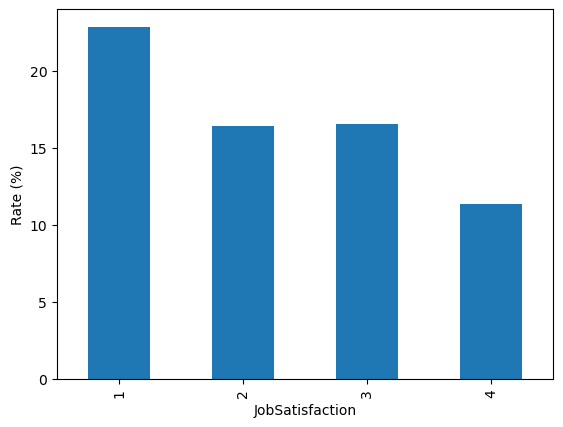

In [14]:
# sort
cross_table.sort_values('Rate', ascending=True).reset_index(drop=True)

# barplot
cross_table['Rate'].plot(kind='bar', stacked=False)

# atribut
plt.ylabel('Rate (%)')


pegawai yang turnover kebanyakan memiliki tingkat kepuasan 1. kebanyakan pegawai turnover karena tidak puas dengan pekerjaannya

## Apakah Relationship Satisfaction Berpengaruh Terhadap Attrition

H0: Relationship Satisfaction tidak mempengaruhi employee attrition<br>
H1: relationship Satisfaction mempengaruhi employee attrition

uji Chi Square karena kategorikal-kaetgorikal variable.

In [15]:
# calculate chisquare
chi2, p_value, dof, expected = chi2square(df,'RelationshipSatisfaction','Attrition')

# besar pvalue
print('P Value : ',p_value)

# Interpretasi hasil
# kondisi tolak H0
if p_value < 0.05:
    print('H0 berhasil ditolak: Relationship Satisfaction mempengaruhi employee attrition')
# kondisi gagal tolak H0
else:
    print('H0 gagal ditolak: Relationship Satisfaction tidak mempengaruhi employee attrition')

P Value :  0.15497244371052638
H0 gagal ditolak: Relationship Satisfaction tidak mempengaruhi employee attrition


## Bagaimana Pengaruh Relationship Satisfaction Terhadap Attrition

In [16]:
# melihat cross tabulation
cross_table = crosstable(df,'RelationshipSatisfaction','Attrition')

# calculate rate
cross_table['Rate'] = (cross_table['Yes'] / (cross_table['Yes'] + cross_table['No']))*100

# save
cross_table.to_csv('ct_RelationshipSatisfaction.csv')

# show crosstable
cross_table

Attrition,No,Yes,Rate
RelationshipSatisfaction,,,
1,219,57,20.652174
2,258,45,14.851485
3,388,71,15.468410
4,368,64,14.814815


dapat dilihat bahwa 20% karyawan turnover karena tidak senang dengan hubungan dengan rekan kerjanya

Text(0, 0.5, 'Rate (%)')

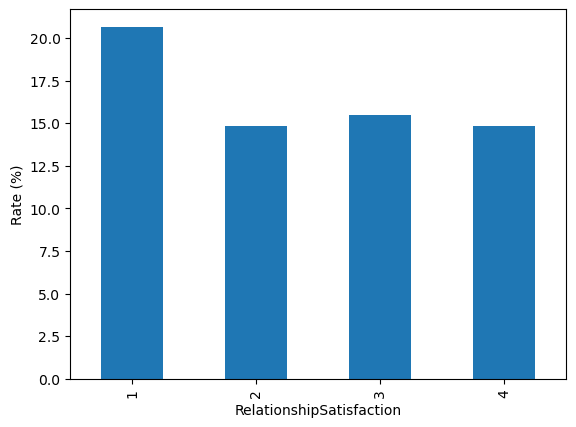

In [17]:
# sort
cross_table.sort_values('Rate', ascending=True).reset_index(drop=True)

# barplot
cross_table['Rate'].plot(kind='bar', stacked=False)

# atribut
plt.ylabel('Rate (%)')


pegawai yang turnover kebanyakan memiliki tingkat kepuasan 1. kebanyakan pegawai turnover karena tidak puas dengan hubungan dengan rekan kerjanya

## Apakah Work-Life Balance Berpengaruh Terhadap Attrition

H0: Work-Life Balance tidak mempengaruhi employee attrition<br>
H1: Work-Life Balance mempengaruhi employee attrition

uji Chi Square karena kategorikal-kaetgorikal variable.

In [18]:
# calculate chisquare
chi2square(df,'WorkLifeBalance','Attrition')

# besar pvalue
print('P Value : ',p_value)

# Interpretasi hasil
# kondisi tolak H0
if p_value < 0.05:
    print('H0 berhasil ditolak: Work-Life Balance mempengaruhi employee attrition')
# kondisi gagal tolak H0
else:
    print('H0 gagal ditolak: Work-Life Balance tidak mempengaruhi employee attrition')

P Value :  0.15497244371052638
H0 gagal ditolak: Work-Life Balance tidak mempengaruhi employee attrition


## Bagaimana Pengaruh Work-Life Balance Terhadap Attrition

In [19]:
# melihat cross tabulation
cross_table = crosstable(df,'WorkLifeBalance','Attrition')

# calculate rate
cross_table['Rate'] = (cross_table['Yes'] / (cross_table['Yes'] + cross_table['No']))*100

# save
cross_table.to_csv('ct_WorkLifeBalance.csv')

# show crosstable
cross_table

Attrition,No,Yes,Rate
WorkLifeBalance,,,
1,55,25,31.250000
2,286,58,16.860465
3,766,127,14.221725
4,126,27,17.647059


dapat dilihat bahwa 31% karyawan turnover karena tidak senang dengan work-life balance yang ada

Text(0, 0.5, 'Rate (%)')

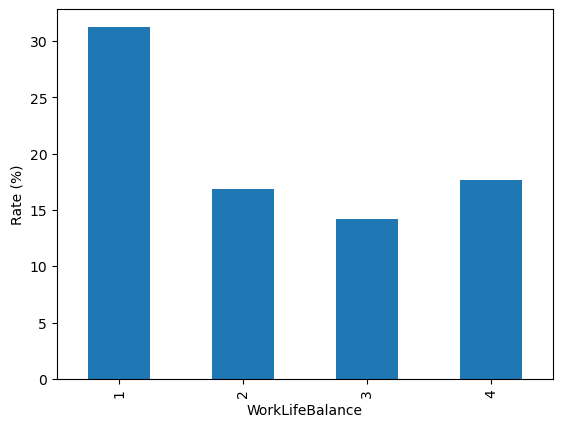

In [20]:
# sort
cross_table.sort_values('Rate', ascending=True).reset_index(drop=True)

# barplot
cross_table['Rate'].plot(kind='bar', stacked=False)

# atribut
plt.ylabel('Rate (%)')


pegawai yang turnover kebanyakan memiliki tingkat kepuasan 1. kebanyakan pegawai turnover karena tidak puas work-life balance yang ada

## Bagaimana Pengaruh Lama Bekerja di Perusahaan terhadap Attrition

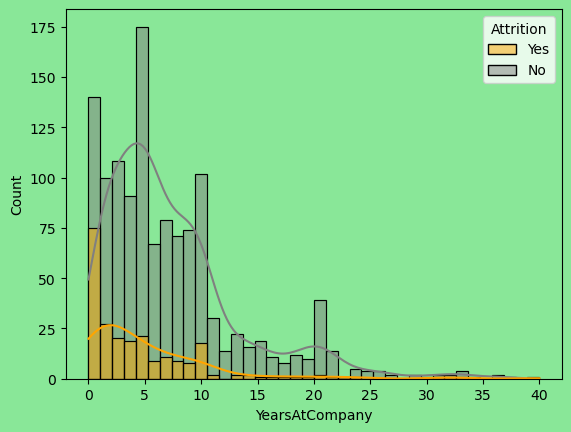

In [22]:
fig, ax = plt.subplots()
fig.set_facecolor('#89e798')  # Set figure background color

# Create the histogram and set the color palette
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', kde=True, 
             palette={'Yes': 'orange', 'No': 'gray'}, ax=ax)

# Set the background color for the axes (plot area)
ax.set_facecolor('#89e798')

# Display the plot
plt.show()

lamanya karyawan bekerja untuk perusahaan mempengaruhi Attrition karyawan, dimana semakin lama karyawan tersebut bekerja untuk perusahaan maka semakin rendah kemungkinan untuk meninggalkan perusahaan. malahan kebanyakan karyawan yang mengalami attrition adalah karyawan yang baru bekerja kurang dari 6 tahun di perusahaan

# Kesimpulan

persentase attrition adalah 16% yang mana angka tersebut cukup besar dimana sebagian besar pekerja mengalami Attrition dikarenakan oleh ketidakpuasan pada pekerjaannya, lingkungan kerjanya, hubungan dengan rekan kerjanya dan work-life balance yang ditunjukkan oleh pemberian nilai 1 pada kategori-kategori tersebut yang menyatakan ketidak puasan. Hal tersebut menandakan perusahaan memiliki budaya kerja yang buruk. 

Selain itu, lama waktu mengabdi pada perusahaan juga mempengaruhi Attrition, dimana pekerja-pekerja yang masih kurang dari 6 tahun bersama perusahaan cenderung mengalami Attrition. hal tersebut kemungkinan disebabkan oleh budaya kerja yang buruk tersebut

# Rekomendasi

untuk dapat mengurangi persentase attrition, rekomendasi yang saya berikan:
1. memperbaiki budaya kerja (work-life balance, relationship, environment, job satisfaction) untuk meningkatkan satisfaction score
2. lakukan survey satisfaction secara berkala
3. fokus pada karyawan baru untuk membantunya beradaptasi
4. meningkatkan komunikasi antara manajer dan karyawan